In [15]:
import sys

sys.path.append("../src/spm")

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import electrode_dynamics
import importlib

importlib.reload(electrode_dynamics)
from electrode_dynamics import *

In [17]:
F = 96485.3321233100184
R = 8.31446261815324
T = 298.15
F_RT = F / (R * T)
Nx = 100
Ntau = 10000
t_max = 1.2e3
x = np.linspace(0, 1, Nx)
t = np.linspace(0, t_max, Ntau)
U0 = 3.75
nu = 1e-3
Uapp = U0 + nu * (t_max / 2 - np.abs(t - t_max / 2))
params = {
    "x": x,
    "t": t,
    "Uapp": Uapp,
    "r0": 5e-4,
    "a": 1.36,
    "F_RT": F_RT,
    "D": 2.2e-9,
}

Text(0, 0.5, '$j$')

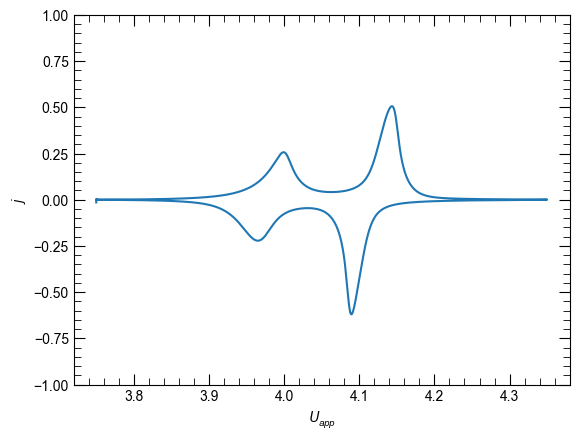

In [18]:
ydata, js, tau, Uapp = simulate_electrochemical_system(**params)
fig, ax = plt.subplots()
ax.plot(Uapp, js)
ax.set_ylim(-1, 1)
ax.set_xlabel("$U_{app}$")
ax.set_ylabel("$j$")

Text(0, 0.5, '$y$')

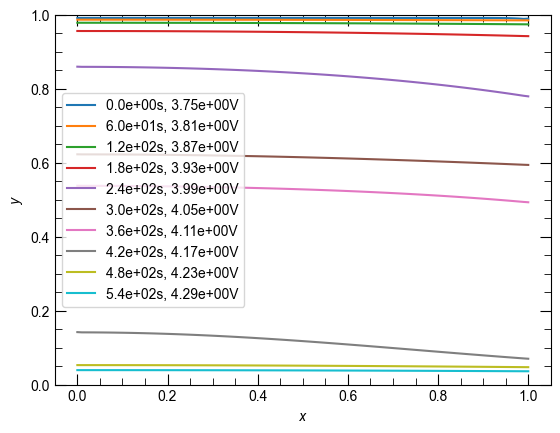

In [19]:
fig, ax = plt.subplots()
for i in range(0, Ntau // 2, Ntau // 20):
    ax.plot(x, ydata[i, :], label=f"{t[i]:.1e}s, {Uapp[i]:.2e}V")
ax.set_ylim(0, 1)
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

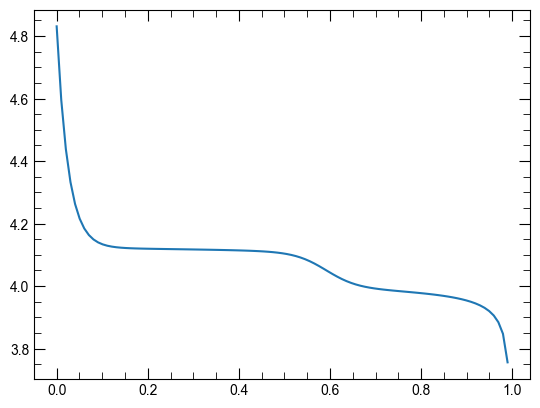

In [20]:
y = np.linspace(0, 1, 100)
ocv = ocv_LMO(y)
fig, ax = plt.subplots()
ax.plot(y, ocv)

In [21]:
ocv_LMO(0.992)

np.float64(3.7131318772016737)

In [22]:
ydata, js, tau, Uapp_out = simulate_electrochemical_system(
    x=x, t=t, Uapp=Uapp, r0=r0, a=a, F_RT=F_RT, D=D
)

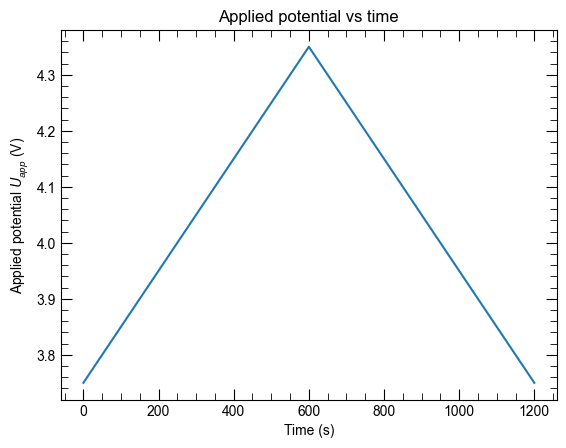

In [23]:
fig, ax = plt.subplots()
ax.plot(t, Uapp_out)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Applied potential $U_{app}$ (V)")
ax.set_title("Applied potential vs time")
plt.show()